# Previsão de lucros


### importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

### leitura do arquivo


In [2]:
vendas_df = pd.read_csv('datasets/SalesData.csv')
vendas_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


<AxesSubplot:xlabel='Revenue', ylabel='Temperature'>

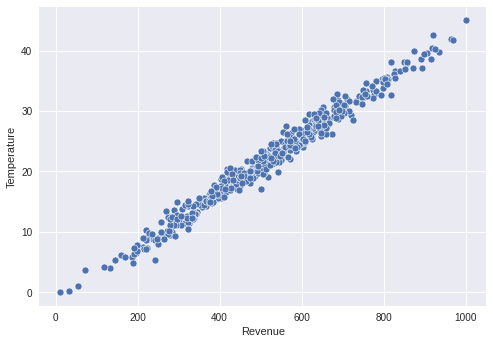

In [3]:
sns.scatterplot(x='Revenue', y='Temperature', data=vendas_df)

### Criação das variaveis da base de dados


In [4]:
X_train, y_train = vendas_df['Temperature'], vendas_df['Revenue']

In [6]:
X_train.shape, y_train.shape

((500,), (500,))

### Criando o modelo

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
#model.add(tf.keras.layers.Dense(units=1))
#model.add(tf.keras.layers.Dense(units=1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [10]:
epoch_hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 288455.7812
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 248060.3594
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 212156.8594
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 179990.7812
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 151576.4062
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 126889.7031
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 105576.7344
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 87117.6094
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 71463.7266
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 58069.7773
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 46896.0703
Epoch 12/100
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 1ms/step - loss: 669.5656
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 669.0972


In [11]:
model.output_shape

(None, 1)

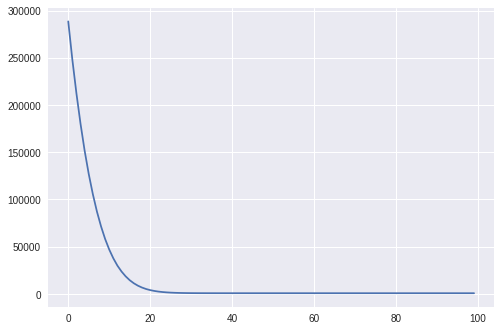

In [12]:
plt.plot(epoch_hist.history['loss'])

In [13]:
model.get_weights()

[array([[22.235876]], dtype=float32), array([25.026722], dtype=float32)]

In [14]:
pred_5g = 5
pred = model.predict([pred_5g])
pred

array([[136.2061]], dtype=float32)

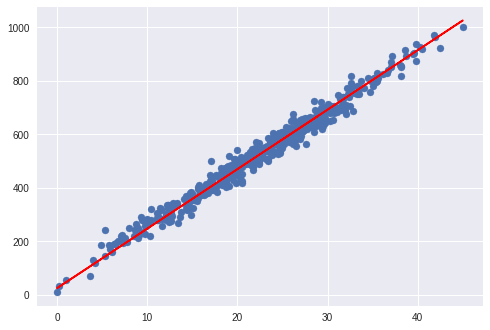

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')